In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset/students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [4]:
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


In [5]:
for i in df.columns:
    print("The Unique values in the column: ", i , df[i].unique())
    print("-"*25)

The Unique values in the column:  Gender ['Boy' 'Girl']
-------------------------
The Unique values in the column:  Age ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
-------------------------
The Unique values in the column:  Education Level ['University' 'College' 'School']
-------------------------
The Unique values in the column:  Institution Type ['Non Government' 'Government']
-------------------------
The Unique values in the column:  IT Student ['No' 'Yes']
-------------------------
The Unique values in the column:  Location ['Yes' 'No']
-------------------------
The Unique values in the column:  Load-shedding ['Low' 'High']
-------------------------
The Unique values in the column:  Financial Condition ['Mid' 'Poor' 'Rich']
-------------------------
The Unique values in the column:  Internet Type ['Wifi' 'Mobile Data']
-------------------------
The Unique values in the column:  Network Type ['4G' '3G' '2G']
-------------------------
The Unique values in the column:  Class Dura

## Univariate Analysis

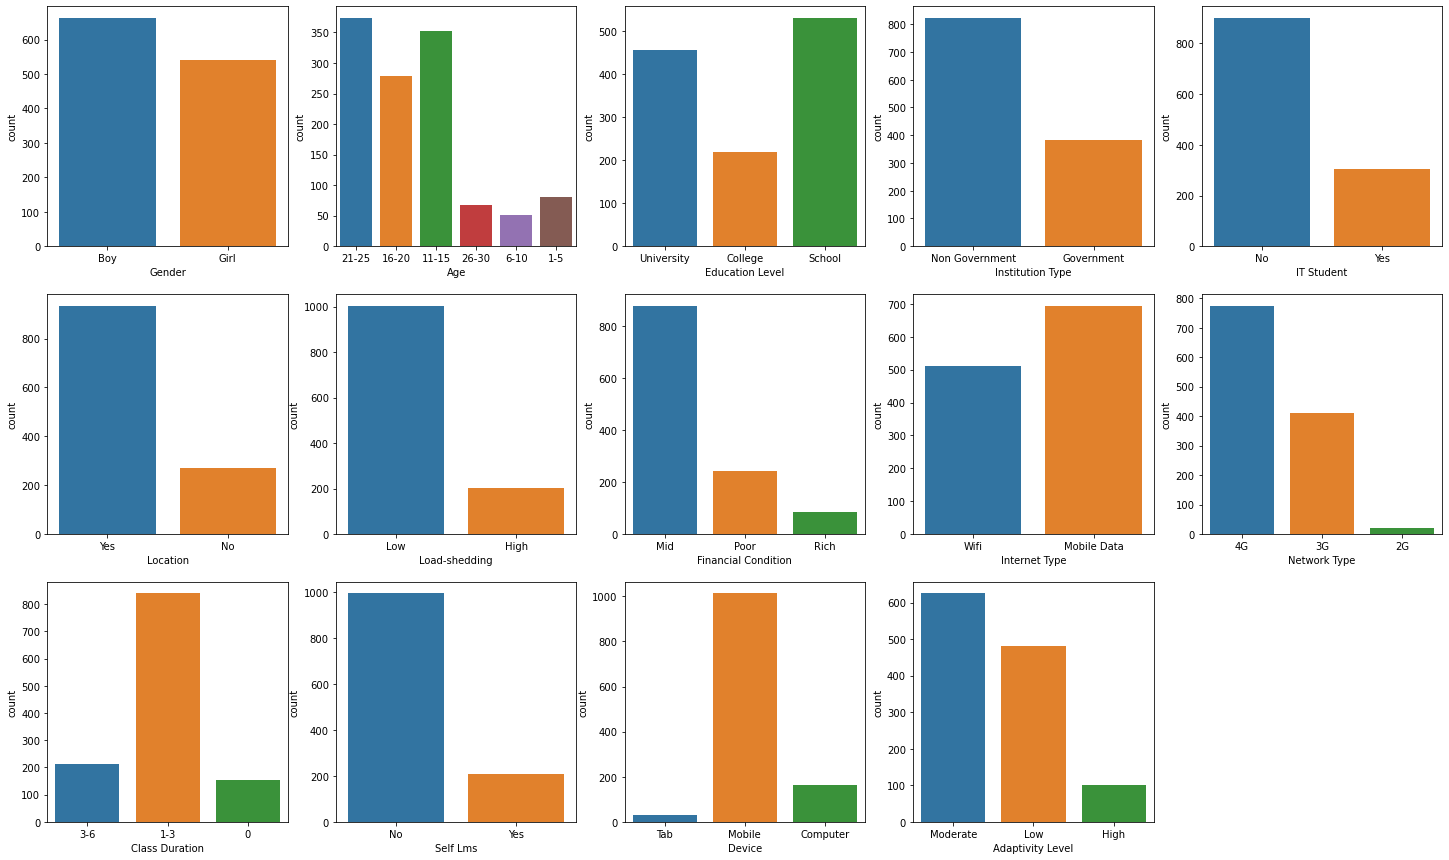

In [6]:
c = 1
plt.figure(figsize=(25,15))
for i in df:
    plt.subplot(3,5,c)
    sns.countplot(x = i, data=df)
    c += 1 

**Following are the observations from the above analysis:**
- The count for the boys is greater than of girls in the dataset.
- Most students are in age 11-25.
- Most of the students are in School or University.
- There are more number of students from Non Government Institute than Government Institute.
- Most of the students have low load shedding in their area.
- There are many students that comes under moderate financial condition.
- Many students used Mobile data for the online education rather than home WiFi. In which, most of he students have 4G internet conectivity.
- The class duration is mostly 1-3 hrs.
- Most of the students are in the institute where there is no LMS(Learning Management System) of their own.
- The Primary device for most student is Mobile phones.
- There are very less students which have high level of adaptabilty through online learning.

## Bivariate Analysis

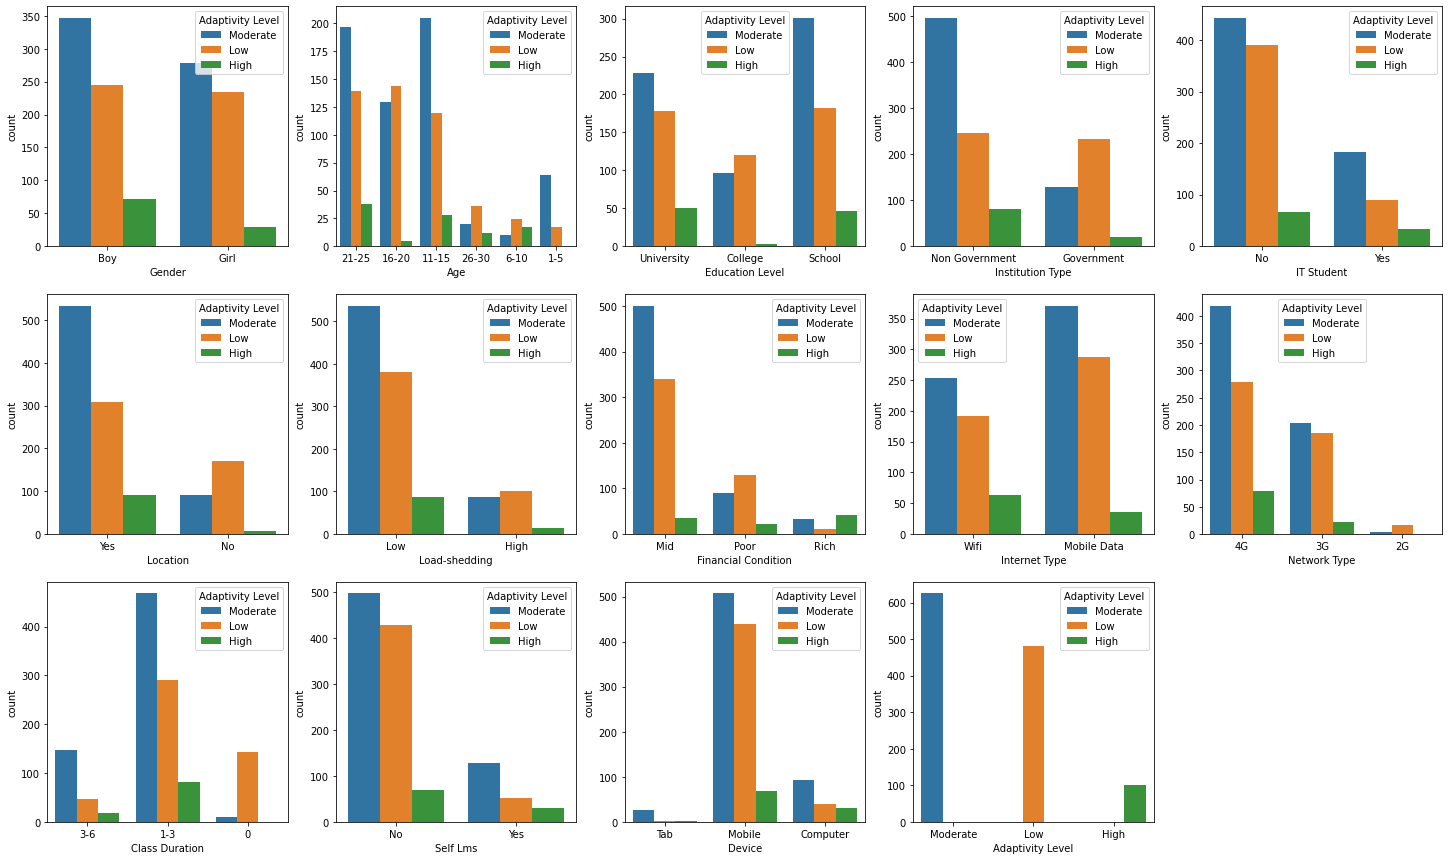

In [7]:
c = 1
plt.figure(figsize=(25,15))
for i in df:
    plt.subplot(3,5,c)
    sns.countplot(x = i, data=df, hue='Adaptivity Level')
    c += 1 

**Following are the observations from the above analysis:**
- In most of the cases, the level of abaptivity is poor, except in the case of the students which are from government institute or the students which have poor financial condition, have high looad shedding in their area, which show the poor adaptivity. 
- It will be obivious that the students who attend zero hrs of class will always have the poor level of abaptivity towards online learning.
- The data showns that there is poor abapatation between the students of ages between 6-10, 16-20 and 26-30.

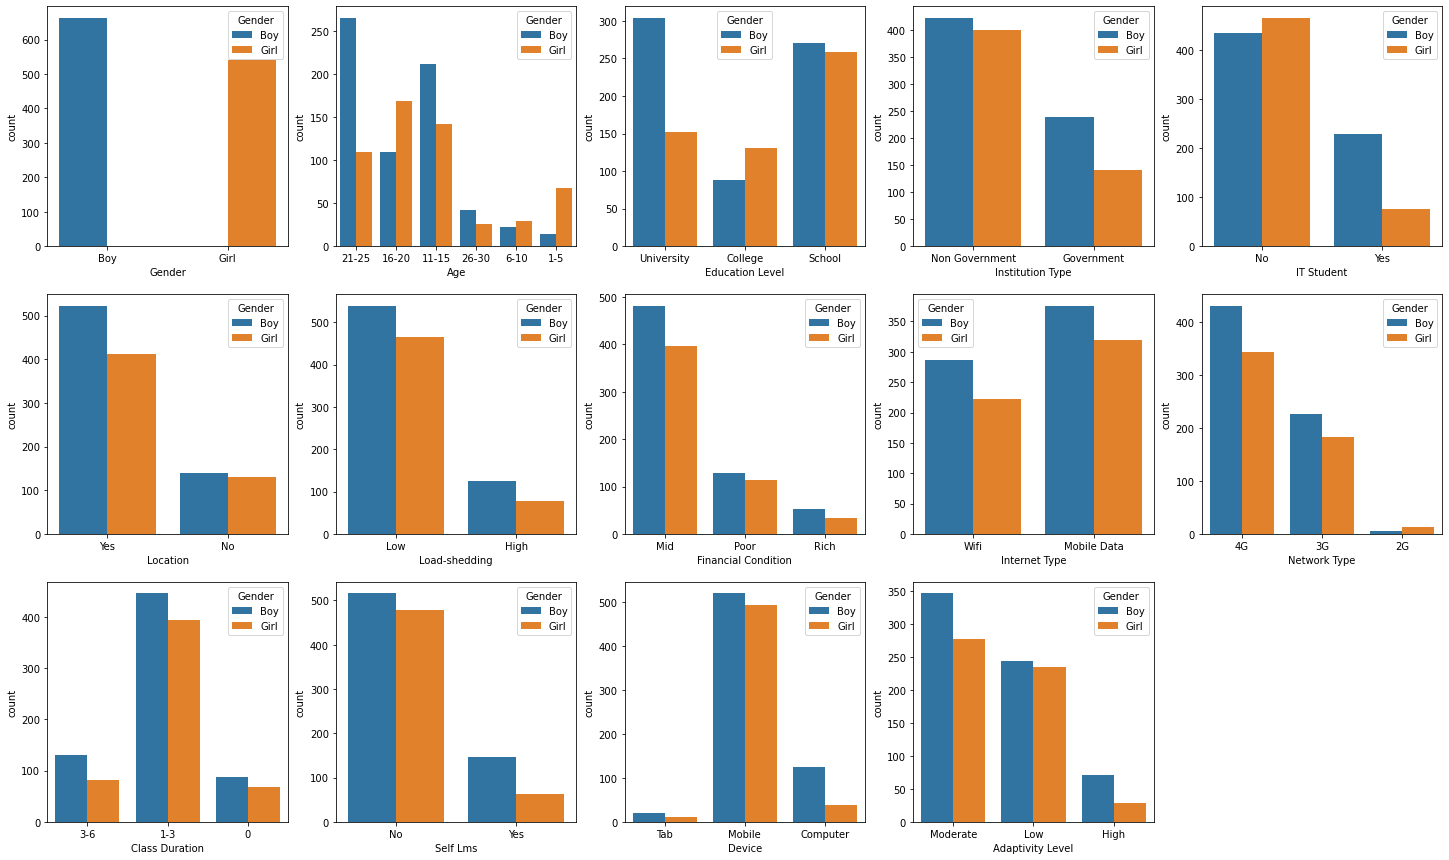

In [8]:
c = 1
plt.figure(figsize=(25,15))
for i in df:
    plt.subplot(3,5,c)
    sns.countplot(x = i, data=df, hue='Gender')
    c += 1 

## Data Transformation

**Since the features in the dataset is in the categorical form, so we will convert them into numerical format using OrdinalEncoder.** 

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
encoder = OrdinalEncoder()

columns = df.columns.drop('Adaptivity Level')

encoded = encoder.fit_transform(df.drop(["Adaptivity Level"], axis=1)) 
encoded_df = pd.DataFrame(encoded, columns= columns)

# Use replace method for target variable
encoded_df['Adaptivity Level'] = df['Adaptivity Level'].replace(['Low', 'Moderate', 'High'],[1.0, 2.0, 3.0])

In [11]:
encoded_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


## Spliting the dataset into train-test split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
X = encoded_df.drop(columns='Adaptivity Level', axis=1)
y = encoded_df['Adaptivity Level']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Model Building

We will be using different ML classifier Algorithms listed below for training our model.
   - LR  = LogisticRegression()
   - DTR = DecisionTreeClassifier()
   - RFR = RandomForestClassifier()
   - KNR = KNeighborsClassifier()
   - SVC = SVC() 

And compare the result to get the best classifier for the dataset.

### 1. Logistic Regressor

In [15]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(X_train, y_train)
lor_predict = lor.predict(X_test)
lor_accuracy = accuracy_score(y_test,lor_predict)*100

### 2. Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test,dtc_predict)*100

### 3. Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test,rfc_predict)*100

### 4. KNeighbors Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,knn_predict)*100

### 5. Support Vector Classifier

In [19]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_predict)*100

### Comparing result

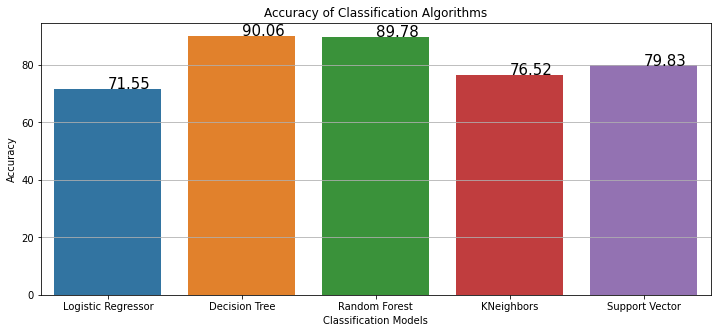

In [20]:
accuracy = [lor_accuracy, dtc_accuracy, rfc_accuracy, knn_accuracy, svc_accuracy]

plt.figure(figsize=(12,5))

sns.barplot(x = ['Logistic Regressor', 'Decision Tree', 'Random Forest', 'KNeighbors', 'Support Vector'], y = accuracy)
plt.title("Accuracy of Classification Algorithms")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy")
for i in accuracy:
    plt.text(x= accuracy.index(i), y = i , s = round(i,2), size = 15)
plt.grid(True, axis='y')

From the above bargraph we can conclude that the model Random Forest Classifier is giving the best accuracy for this dataset. 

So we will take this model as final model.

## Model Building through hyperarameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

### 1. Logistic Regressor

In [33]:
lor_param = {   'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                'penalty' : ['l2'],
                'C' : [100,10, 1.0, 0.1, 0.01]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lor_grid = GridSearchCV(lor, lor_param, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
lor_result = lor_grid.fit(X_train, y_train)
lor_best_param = lor_result.best_params_
lor_best_score = lor_result.best_score_

In [34]:
lor_best_param, lor_best_score

({'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}, 0.6555415499533147)

In [38]:
best_log = LogisticRegression(C = 100, penalty = 'l2', solver = 'newton-cg')
best_log.fit(X_train, y_train)
best_log_predict = best_log.predict(X_test)
best_log_accuracy = accuracy_score(y_test, best_log_predict)*100

### 2. Decision Tree Classifier

In [46]:
dtc_param = {   'max_depth' : [2, 3, 5, 10, 20],
                'min_samples_leaf': [5, 10, 20, 50, 100],
                'criterion': ["gini", "entropy"],
                'splitter' : ['best', 'random'] 
            }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
dtc_grid = GridSearchCV(dtc, dtc_param, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
dtc_result = dtc_grid.fit(X_train, y_train)
dtc_best_param = dtc_result.best_params_
dtc_best_score = dtc_result.best_score_

In [47]:
dtc_best_param, dtc_best_score

({'criterion': 'entropy',
  'max_depth': 20,
  'min_samples_leaf': 5,
  'splitter': 'random'},
 0.7477777777777778)

In [54]:
best_dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf= 5, splitter='random')
best_dtc.fit(X_train, y_train)
best_dtc_predict = best_dtc.predict(X_test)
best_dtc_accuracy = accuracy_score(y_test, best_dtc_predict)*100

In [55]:
best_dtc_accuracy

77.90055248618785

### 3. Random Forest Classifier

In [56]:
rfc_param = {   'n_estimators' : [10, 100, 1000],
                'max_features': ['sqrt', 'log2'] 
            }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rfc_grid = GridSearchCV(rfc, rfc_param, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
rfc_result = rfc_grid.fit(X_train, y_train)
rfc_best_param = rfc_result.best_params_
rfc_best_score = rfc_result.best_score_

In [57]:
rfc_best_score, rfc_best_param

(0.8940522875816993, {'max_features': 'log2', 'n_estimators': 100})

In [58]:
best_rfc = RandomForestClassifier(max_features='log2', n_estimators= 100)
best_rfc.fit(X_train, y_train)
best_rfc_predict = best_rfc.predict(X_test)
best_rfc_accuracy = accuracy_score(y_test, best_rfc_predict)*100

In [59]:
best_rfc_accuracy

90.33149171270718

### 4. KNeighbors Classifier

In [60]:
knn_param = {   'n_neighbors' : range(1,21,2),
                'weights' : ['uniform', 'distance'],
                "metric" : ['euclidean', 'manhattan', 'minkowski']
            }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_grid = GridSearchCV(knn, knn_param, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
knn_result = knn_grid.fit(X_train, y_train)
knn_best_param = knn_result.best_params_
knn_best_score = knn_result.best_score_

In [61]:
knn_best_score, knn_best_param

(0.8976003734827264,
 {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'})

In [62]:
best_knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors= 3, weights = 'distance')
best_knn.fit(X_train, y_train)
best_knn_predict = best_knn.predict(X_test)
best_knn_accuracy = accuracy_score(y_test, best_knn_predict)*100

In [63]:
best_knn_accuracy

88.95027624309392

### 5. Support Vector Classifier

In [65]:
svc_param = {   'kernel' : ['poly', 'rbf', 'sigmoid'],
                'C' : [50, 10, 1.0, 0.1, 0.01],
                'gamma' : ['scale']
            }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
svc_grid = GridSearchCV(svc, svc_param, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
svc_result = svc_grid.fit(X_train, y_train)
svc_best_param = svc_result.best_params_
svc_best_score = svc_result.best_score_

In [66]:
svc_best_score, svc_best_param

(0.8849486461251167, {'C': 50, 'gamma': 'scale', 'kernel': 'poly'})

In [67]:
best_svc = SVC(C=50 , gamma='scale', kernel='poly')
best_svc.fit(X_train, y_train)
best_svc_predict = best_svc.predict(X_test)
best_svc_accuracy = accuracy_score(y_test, best_svc_predict)*100

In [68]:
best_svc_accuracy

87.29281767955801

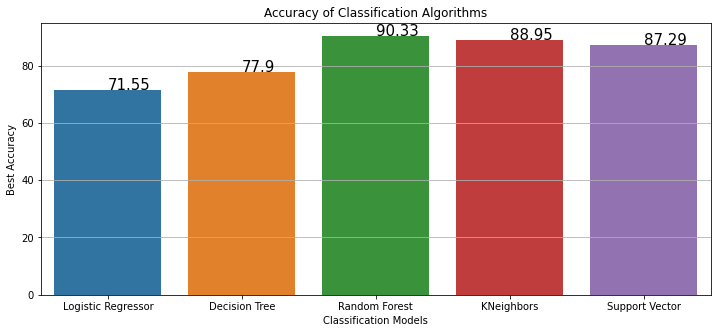

In [70]:
best_accuracy = [best_log_accuracy, best_dtc_accuracy, best_rfc_accuracy, best_knn_accuracy, best_svc_accuracy]

plt.figure(figsize=(12,5))

sns.barplot(x = ['Logistic Regressor', 'Decision Tree', 'Random Forest', 'KNeighbors', 'Support Vector'], y = best_accuracy)
plt.title("Accuracy of Classification Algorithms")
plt.xlabel('Classification Models')
plt.ylabel("Best Accuracy")
for i in best_accuracy:
    plt.text(x= best_accuracy.index(i), y = i , s = round(i,2), size = 15)
plt.grid(True, axis='y')

### Comparing both the accuracy

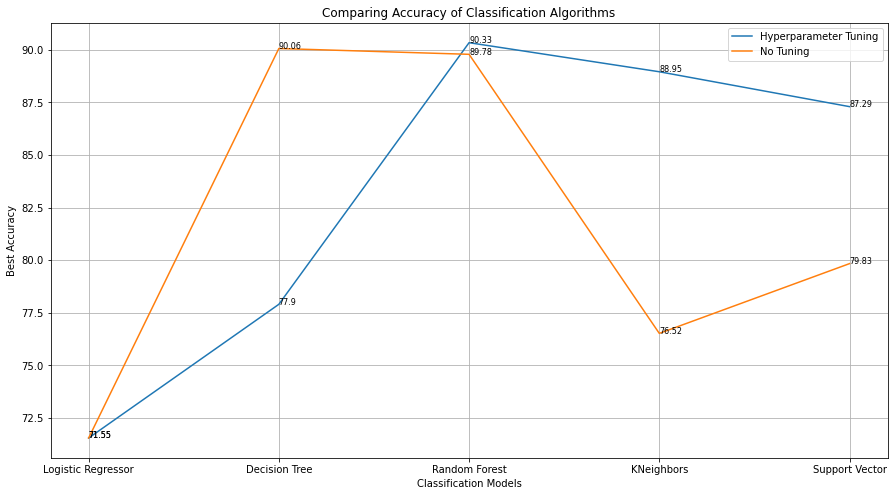

In [78]:
plt.figure(figsize=(15,8))
sns.lineplot(x = ['Logistic Regressor', 'Decision Tree', 'Random Forest', 'KNeighbors', 'Support Vector'], y = best_accuracy)
sns.lineplot(x = ['Logistic Regressor', 'Decision Tree', 'Random Forest', 'KNeighbors', 'Support Vector'], y = accuracy)
plt.title("Comparing Accuracy of Classification Algorithms")
plt.legend(['Hyperparameter Tuning', 'No Tuning'])
plt.grid(True)
plt.xlabel('Classification Models')
plt.ylabel("Best Accuracy")

for i in best_accuracy:
    plt.text(x= best_accuracy.index(i), y = i , s = round(i,2), size = 8)
for i in accuracy:
    plt.text(x= accuracy.index(i), y = i , s = round(i,2), size = 8)

- Here we can see that after hyperparameter tuning the Accuracy for the **Decision Tree Classifier** has reduced very much.
- But the accuracy for **Random Forest Classifier** has increased to highest.
- So we will consider **Random Forest Classifier** as our model for this dataset.